>10 0.921 (0.079)
>11 0.888 (0.105)
>12 0.905 (0.108)
>13 0.888 (0.105)
>14 0.888 (0.105)
>15 0.902 (0.109)
>16 0.902 (0.109)
>17 0.888 (0.105)
>18 0.888 (0.105)
>19 0.888 (0.105)


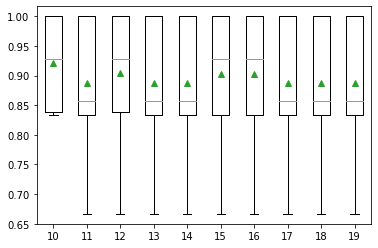

NameError: name 'plt' is not defined

In [3]:
# explore the number of selected features for RFE
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
df = pd.read_csv("final_mas5_drop_liver_transposed_final.csv")
    
# get the dataset
def get_dataset():
	X = df.iloc[:,:-1].values
	y = df.iloc[:,-1].values
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(10, 20):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
